Jerry Cheng  
HW3  
CS-559  

# SVM II

The first step is to create the data table. I have created a few arrays that are the columns of the table.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x1 = [4.0, 4.0, 1.0, 2.5, 4.9, 1.9, 3.5, 0.5, 2.0, 4.5]
x2 = [2.9, 4.0, 2.5, 1.0, 4.5, 1.9, 4.0, 1.5, 2.1, 2.5]
y =  [1,   1,   -1,  -1,  1,   -1,  1,   -1,  -1,  1]
a =  [0.414, 0, 0, 0.018, 0, 0, 0.018, 0, 0.414, 0]

### A: What is equation of the SVM hyperplane h(x)? Draw the hyperplane with the 10 points. 

Y = mx + b

M = sum(x1 * y * a)

In [2]:
m = 0

for i in range(len(x1)):
    m = m + (x1[i] * y[i] * a[i])
print(m)

0.846


Therefore, M = 0.846

Y = 0.846X + B

2.9 = 0.846 (4.0) + B1  
B1 = 6.284

2.1 = 0.846 (2.0) + B2  
B2 = 3.792  

b = ((B2 - B1) / 2) + B2 = 5.038  

Therefore, the full equation is
  
Y = 0.846X + 5.038

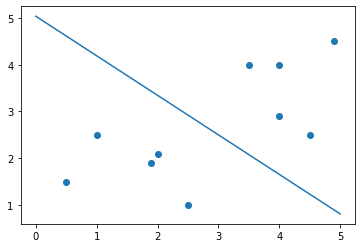

In [3]:
x_svm = np.linspace(0, 5, 10)
y_svm = - 0.846*x_svm + 5.038

plt.scatter(x1, x2)
plt.plot(x_svm, y_svm)
plt.show()

### B: What is the distance of x_6 from the hyperplane? Is this within the margin of the classifier?

In [4]:
hyperplane = abs(0.864 * (1.9 + 1.9) - 5.038)
y = np.sqrt((0.846*0.846) + 1)
print(hyperplane / y)

1.3396918799788504


Yes, it is within the margin of the classifier.

### C: Classify the point z=(3,3)^T using h(x) from above. 

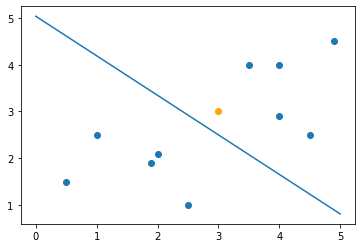

In [5]:
x_svm = np.linspace(0, 5, 10)
y_svm = - 0.846*x_svm + 5.038

plt.scatter(x1, x2)
plt.scatter([3],[3], color="orange")
plt.plot(x_svm, y_svm)
plt.show()

The point (3,3) is located above of the classifier. Therefore, it can be classified as 1.

# Gaussian Process

### 1. Implement Gaussian Kernel, draw some plots of curves

In [6]:
def squared_exponential_kernel(x1, x2, width):
    
    distance = np.sum(x1**2, 1).reshape(-1, 1) + np.sum(x2**2, 1) - 2*np.dot(x1, x2.T)
    
    result = np.exp((- 1 / (2 * width)) * distance)
    
    return result

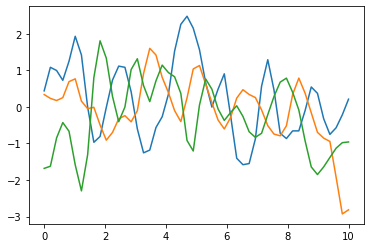

In [7]:
# Prior = 0.1

test = np.linspace(0, 10, 50).reshape(-1, 1)

kernel = squared_exponential_kernel(test, test, 0.1)
L = np.linalg.cholesky(kernel + 1e-15*np.eye(50))
prior = np.dot(L, np.random.normal(size=(50, 3)))

plt.plot(test, prior)
plt.show()

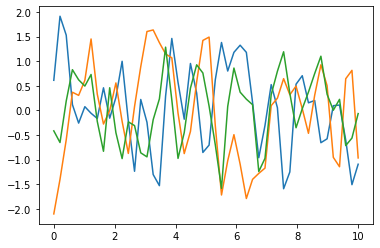

In [8]:
# Prior = 0.05

test = np.linspace(0, 10, 50).reshape(-1, 1)

kernel = squared_exponential_kernel(test, test, 0.05)
L = np.linalg.cholesky(kernel + 1e-15*np.eye(50))
prior = np.dot(L, np.random.normal(size=(50, 3)))

plt.plot(test, prior)
plt.show()

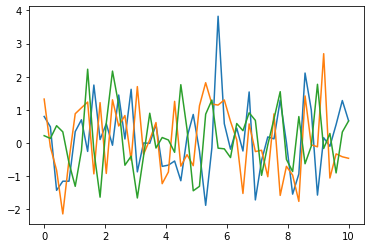

In [9]:
# Prior = 0.01

test = np.linspace(0, 10, 50).reshape(-1, 1)

kernel = squared_exponential_kernel(test, test, 0.01)
L = np.linalg.cholesky(kernel + 1e-15*np.eye(50))
prior = np.dot(L, np.random.normal(size=(50, 3)))

plt.plot(test, prior)
plt.show()

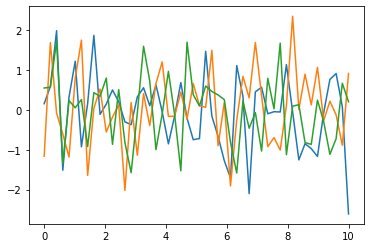

In [10]:
# Prior = 0.001

test = np.linspace(0, 10, 50).reshape(-1, 1)

kernel = squared_exponential_kernel(test, test, 0.001)
L = np.linalg.cholesky(kernel + 1e-15*np.eye(50))
prior = np.dot(L, np.random.normal(size=(50, 3)))

plt.plot(test, prior)
plt.show()

It seems like the smaller the kernel width, the more clumped/closer together the different lines are.

### 2. Test your Gaussian process regression with the following example. Generate synthetic data from the model: 

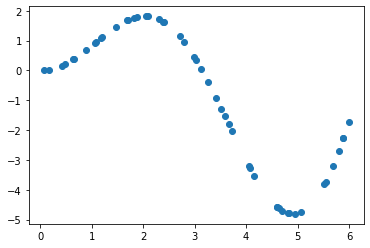

In [11]:
# Generates random data between the interval [0, 2pi], sample size 50
xraw = np.random.uniform(low = 0, high = 2 * np.pi, size = 50).reshape(50,1)
yraw = xraw * np.sin(xraw)

# Plot the raw data
plt.scatter(xraw, yraw)
plt.show()

# Decision Tree

In [12]:
filename = "auto-mpg.data"
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']
df = pd.read_csv(filename, delim_whitespace=True, names=column_names)

In [13]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [14]:
df.isnull().sum() / df.shape[0] * 100.00

mpg             0.0
cylinders       0.0
displacement    0.0
horsepower      0.0
weight          0.0
acceleration    0.0
year            0.0
origin          0.0
name            0.0
dtype: float64

In [15]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [16]:
df.origin.unique()

array([1, 3, 2])

In [17]:
mpg_cut=(df.mpg.max()+df.mpg.min())/2
print(mpg_cut,df.mpg.max(),df.mpg.min())

27.8 46.6 9.0


In [18]:
df['horsepower']=pd.to_numeric(df['horsepower'],errors='coerce')
df['year']=df['year'].astype(float)

df['mpg'] = pd.cut(df.mpg, bins=[df.mpg.min()-1,mpg_cut,df.mpg.max()], labels=[0,1])

In [19]:
def value_cut(data,feature):
    for feat in feature:
        feat_max=data[feat].max()
        feat_min=data[feat].min()
        feat_cut1=(feat_max+feat_min)/3
        data[feat]=pd.cut(df[feat],bins=[feat_min,feat_cut1,feat_cut1*2,feat_max],labels=[0,1,2])
        print(feat,":",feat_min,feat_cut1,2*feat_cut1,feat_max)
        
    return data

value_cut(df,['displacement','acceleration','weight','horsepower'])

displacement : 68.0 174.33333333333334 348.6666666666667 455.0
acceleration : 8.0 10.933333333333332 21.866666666666664 24.8
weight : 1613.0 2251.0 4502.0 5140.0
horsepower : 46.0 92.0 184.0 230.0


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,0,8,1,1,1,1,70.0,1,chevrolet chevelle malibu
1,0,8,2,1,1,1,70.0,1,buick skylark 320
2,0,8,1,1,1,1,70.0,1,plymouth satellite
3,0,8,1,1,1,1,70.0,1,amc rebel sst
4,0,8,1,1,1,0,70.0,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,0,4,0,0,1,1,82.0,1,ford mustang gl
394,1,4,0,0,0,2,82.0,2,vw pickup
395,1,4,0,0,1,1,82.0,1,dodge rampage
396,1,4,0,0,1,1,82.0,1,ford ranger


In [20]:
yearmin=df.year.min()
yearmax=df.year.max()
x=(yearmax-yearmin)/4
print(yearmin,yearmax,x)
yearlist=[yearmin-1,yearmin+4,yearmin+8,yearmax]
print(yearlist)

70.0 82.0 3.0
[69.0, 74.0, 78.0, 82.0]


In [21]:
df['year'] = pd.cut(df.year, bins=yearlist, labels=[0,1,2])

df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,0,8,1,1,1,1,0,1,chevrolet chevelle malibu
1,0,8,2,1,1,1,0,1,buick skylark 320
2,0,8,1,1,1,1,0,1,plymouth satellite
3,0,8,1,1,1,1,0,1,amc rebel sst
4,0,8,1,1,1,0,0,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,0,4,0,0,1,1,2,1,ford mustang gl
394,1,4,0,0,0,2,2,2,vw pickup
395,1,4,0,0,1,1,2,1,dodge rampage
396,1,4,0,0,1,1,2,1,ford ranger


In [22]:
from collections import Counter
import math

def purity(L, metric='gini'):
    total = len(L)
    freq = map(lambda x: float(x) / total, list(Counter(L).values()))
    if metric == 'gini':
        scores = map(lambda x: x * (1 - x), freq)
    elif metric == 'entropy':
        scores = map(lambda x: -x * math.log(x, 2), freq)
    return sum(scores)
for feat in ['cylinders','displacement','horsepower','weight','acceleration','year','origin']:
    L=list(df[feat])
    print(feat,purity(L))

cylinders 0.6256028888159391
displacement 0.5762354485997828
horsepower 0.5580793414307719
weight 0.4478801040377767
acceleration 0.09215676371808797
year 0.6628115451630009
origin 0.5382566096815737


In [23]:
df=df.iloc[:,0:7]
df.iloc[:,1:7]

,cylinders,displacement,horsepower,weight,acceleration,year
0,8,1,1,1,1,0
1,8,2,1,1,1,0
2,8,1,1,1,1,0
3,8,1,1,1,1,0
4,8,1,1,1,0,0
...,...,...,...,...,...,...
393,4,0,0,1,1,2
394,4,0,0,0,2,2
395,4,0,0,1,1,2
396,4,0,0,1,1,2


In [24]:
# Using the sklearn Decision Tree Classifier library

from sklearn import tree
tree_model = tree.DecisionTreeClassifier()

tree_model.fit(df.iloc[:,1:7], df.mpg)
tree_model.score(df.iloc[:,1:7], df.mpg)

print(list(df.iloc[:,1:7].columns))
print(tree_model.feature_importances_)

import sklearn.model_selection as model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(df.iloc[:,1:7], df.mpg, train_size=0.8,test_size=0.2, random_state=101)

tree_model.fit(x_train, y_train)
train_error = (1 - tree_model.score(x_train, y_train))
test_error = (1 - tree_model.score(x_test, y_test))
print("The training error is: %.5f" %train_error)
print("The test     error is: %.5f" %test_error)

from sklearn.model_selection import GridSearchCV
grid_para_tree = [{
    "criterion": ["gini", "entropy"],
    "min_samples_leaf": range(1, 10),
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int)
}]
tree_model.set_params(random_state=108)
grid_search_tree = GridSearchCV(tree_model, grid_para_tree, cv=5, scoring='accuracy', n_jobs=-1)
%time grid_search_tree.fit(x_train, y_train)

## The overall accuracy on the test set:
grid_search_tree.score(x_test, y_test)

['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']
[0.01718625 0.0906517  0.03933574 0.57160988 0.00627785 0.27493858]
The training error is: 0.09434
The test     error is: 0.10000
CPU times: user 766 ms, sys: 266 ms, total: 1.03 s
Wall time: 3.72 s


0.9

In [42]:
# Tried to implement decision tree classifier, doesn't work.

import numpy as np
from collections import Counter

def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])

class Node:
    def __init__(self, feature = None, threshold = None, left = None, right = None, *, value = None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf_node(self):
        return self.value is not None

class DecisionTree:
    def __init__(self, min_samples_split = 2, max_depth = 100, n_feats = None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None
    
    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)
        
    def _grow_tree(self, X, y, depth = 0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))
        
        if(depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value = leaf_value)
        
        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)
    
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)
        
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        
        return Node(best_feat, best_thresh, left, right)
    
    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])
    
    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value
        
        if x[node.feature_idx] <= node.threshold:
            return self.traverse_tree(x, node.left)
        
        return self._traverse_tree(x, node.right)
        
    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)
                
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold
        return split_idx, split_thresh
    
    def _information_gain(self, y, X_column, split_thresh):
        parent_entropy = entropy(y)
        
        left_idxs, right_idxs = self._split(X_column, split_thresh)
        
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
        
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r
        
        ig = parent_entropy - child_entropy
        
        return ig
    
    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs
    
    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

In [46]:
import sklearn.model_selection as model_selection

x_train, x_test, y_train, y_test = model_selection.train_test_split(df.iloc[:,1:7], df.mpg, test_size=0.2, random_state=101)

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

clf = DecisionTree(max_depth = 10)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
acc = accuracy(y_test, y_pred)

print ("Accuracy:", acc)

IndexError: list index out of range